<a href="https://colab.research.google.com/github/hawahassan/DSA/blob/main/DSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv('/content/laptops.csv')

In [8]:
df.head(5)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage_type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [9]:
df.shape # check dimension

(2160, 12)

In [10]:
df.isnull().sum()

Laptop             0
Status             0
Brand              0
Model              0
CPU                0
RAM                0
Storage            0
Storage_type      42
GPU             1371
Screen             4
Touch              0
Final Price        0
dtype: int64

In [ ]:
df = df.dropna() #drop null values

In [ ]:
df.isnull().sum()

Laptop          0
Status          0
Brand           0
Model           0
CPU             0
RAM             0
Storage         0
Storage_type    0
GPU             0
Screen          0
Touch           0
Final Price     0
dtype: int64

In [ ]:
df.shape # 1413 rows removed

(781, 12)

In [ ]:
df.dtypes # checking the data type of every column

Laptop           object
Status           object
Brand            object
Model            object
CPU              object
RAM               int64
Storage           int64
Storage_type     object
GPU              object
Screen          float64
Touch            object
Final Price     float64
dtype: object

In [ ]:
df.describe() #generate various summary statistics of a DataFrame
#Note: Only features with numeric data are considered

,RAM,Storage,Screen,Final Price
count,781.000000,781.000000,781.000000,781.000000
mean,22.822023,888.010243,15.935980,1960.431690
std,11.557896,376.492149,0.871735,1012.765083
min,8.000000,256.000000,13.400000,477.590000
25%,16.000000,512.000000,15.600000,1199.000000
50%,16.000000,1000.000000,15.600000,1699.900000
75%,32.000000,1000.000000,16.100000,2461.210000
max,128.000000,4000.000000,18.000000,7150.470000



there is no oulier in this data set

In [ ]:
df.describe(include = 'object') #summary statistics for categorical values

,Laptop,Status,Brand,Model,CPU,Storage_type,GPU,Touch
count,781,781,781,781,781,781,781,781
unique,781,2,16,65,10,1,44,2
top,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,ROG,Intel Core i7,SSD,RTX 3050,No
freq,1,452,256,96,468,781,126,729


<Axes: xlabel='RAM', ylabel='Final Price'>

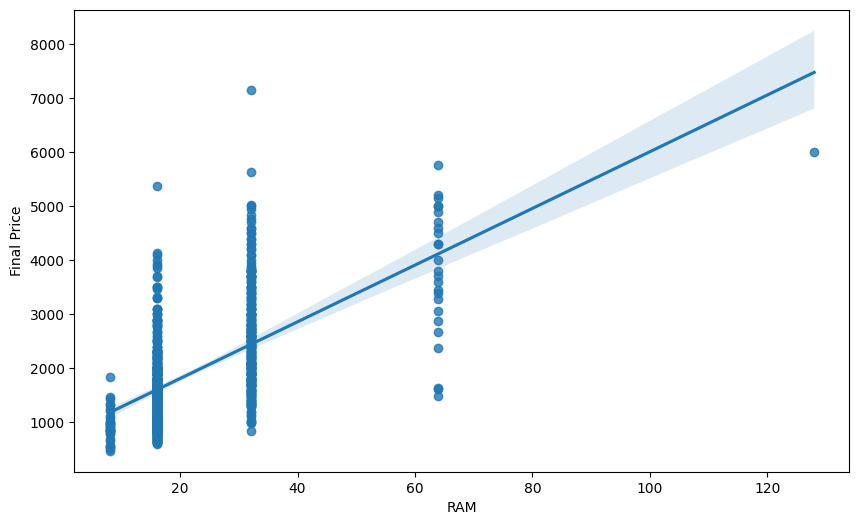

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="RAM", y="Final Price", data=df)

In [ ]:
from scipy import stats

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['RAM'], df['Final Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5980815389073553  with a P-value of P = 6.1915179553114954e-77


<Axes: xlabel='Storage', ylabel='Final Price'>

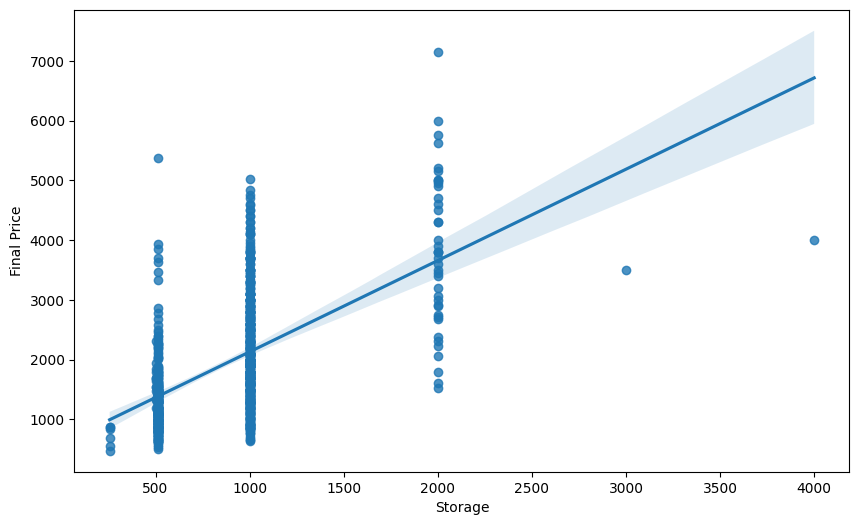

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="Storage", y="Final Price", data=df)

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['Storage'], df['Final Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5676954082541027  with a P-value of P = 7.858284152354033e-68


<Axes: xlabel='Screen', ylabel='Final Price'>

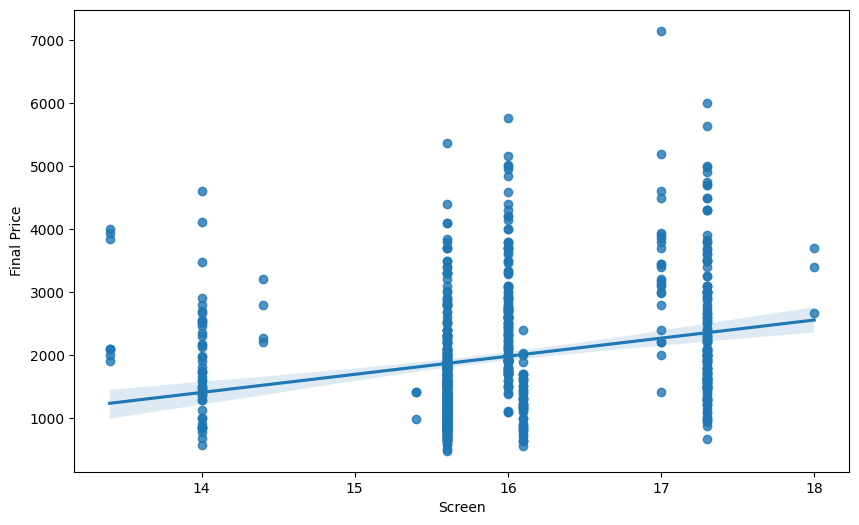

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="Screen", y="Final Price", data=df)

In [ ]:
pearson_coef, p_value = stats.pearsonr(df['Screen'], df['Final Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.24761254362433668  with a P-value of P = 2.2447328809467415e-12


<Axes: xlabel='Brand', ylabel='Final Price'>

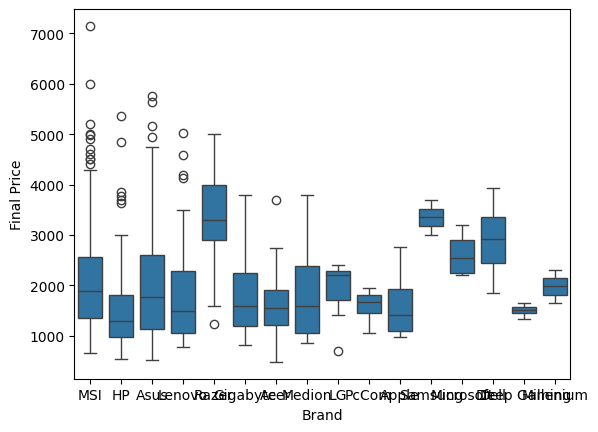

In [ ]:
sns.boxplot(x="Brand", y="Final Price", data=df)

<Axes: xlabel='Status', ylabel='Final Price'>

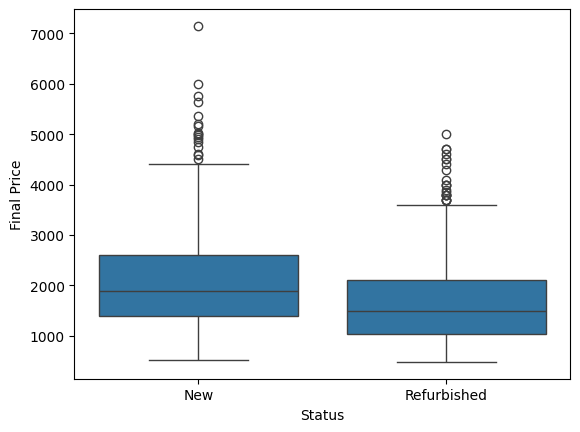

In [ ]:
sns.boxplot(x="Status", y="Final Price", data=df)

<Axes: xlabel='Laptop', ylabel='Final Price'>

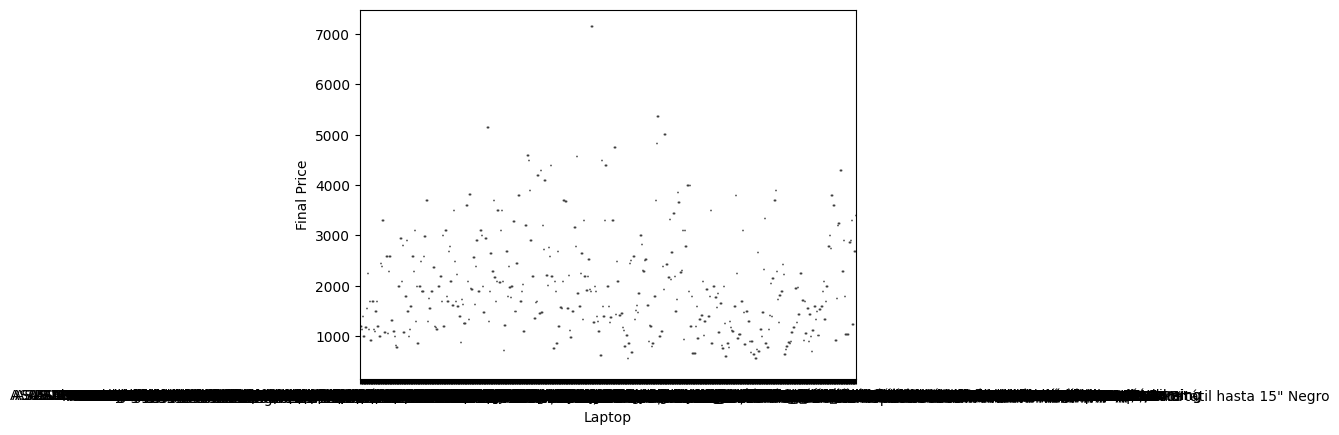

In [ ]:
sns.boxplot(x="Laptop", y="Final Price", data=df)

<Axes: xlabel='Model', ylabel='Final Price'>

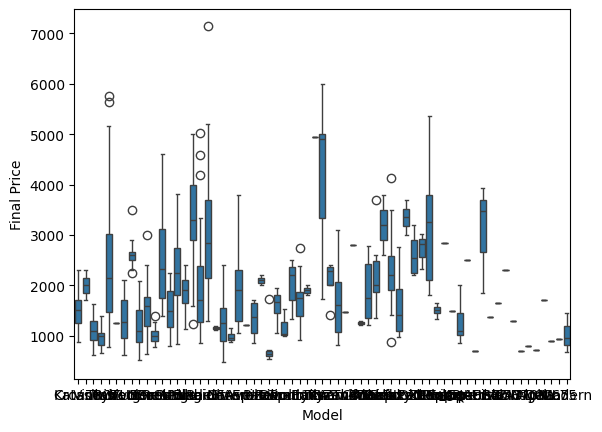

In [ ]:
sns.boxplot(x="Model", y="Final Price", data=df)

<Axes: xlabel='CPU', ylabel='Final Price'>

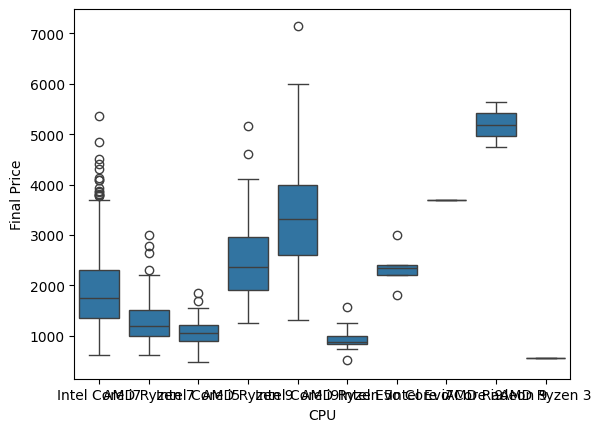

In [ ]:
sns.boxplot(x="CPU", y="Final Price", data=df)

<Axes: xlabel='Storage_type', ylabel='Final Price'>

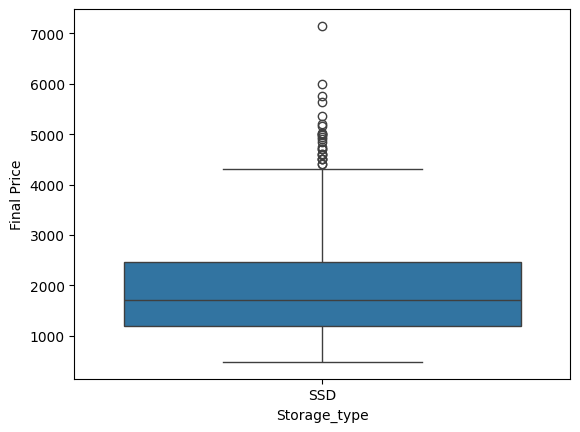

In [ ]:
sns.boxplot(x="Storage_type", y="Final Price", data=df)

<Axes: xlabel='GPU', ylabel='Final Price'>

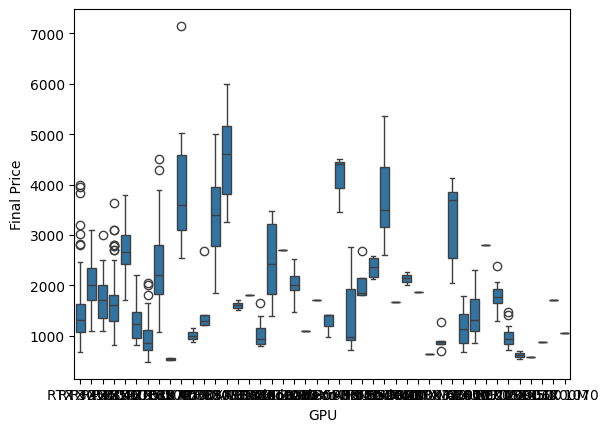

In [ ]:
sns.boxplot(x="GPU", y="Final Price", data=df)

<Axes: xlabel='Touch', ylabel='Final Price'>

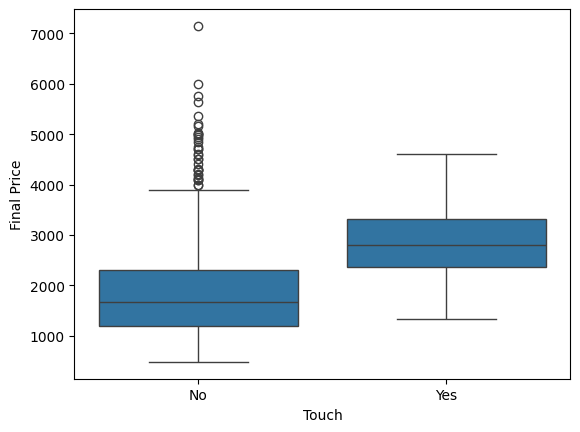

In [ ]:
sns.boxplot(x="Touch", y="Final Price", data=df)

In [ ]:
df.drop(['Laptop', 'Storage_type'], axis = 1, inplace = True) #drop the unneeded columns

In [ ]:
df.shape #2 features are removed

(781, 10)

In [ ]:
labelencoder = LabelEncoder()
df.Brand = labelencoder.fit_transform(df.Brand)
df.Status = labelencoder.fit_transform(df.Status)
df.Model = labelencoder.fit_transform(df.Model)
df.CPU = labelencoder.fit_transform(df.CPU)
df.GPU = labelencoder.fit_transform(df.GPU)
df.Touch = labelencoder.fit_transform(df.Touch)

In [ ]:
df.head(10)

,Status,Brand,Model,CPU,RAM,Storage,GPU,Screen,Touch,Final Price
3,0,9,30,6,16,1000,17,15.6,0,1199.0
5,0,9,15,6,32,1000,22,17.3,0,1699.0
9,0,6,59,6,16,512,17,16.1,0,1149.0
11,0,9,53,6,16,1000,21,15.6,0,1399.0
12,0,2,45,3,16,512,17,15.6,0,1199.0
19,0,9,53,6,16,512,17,15.6,0,999.0
20,0,9,16,5,16,1000,22,15.6,0,1249.0
23,0,2,52,5,16,512,17,15.6,0,1099.0
25,0,2,52,6,16,512,17,15.6,0,1179.0
27,0,6,59,5,16,512,17,15.6,0,999.0


In [ ]:
import scipy.stats as stats

In [ ]:
df = stats.zscore(df) # Calculate the z-score with scipy

In [ ]:
df

,Status,Brand,Model,CPU,RAM,Storage,GPU,Screen,Touch,Final Price
3,-0.853157,0.678504,-0.481652,0.391744,-0.590626,0.297646,-0.230477,-0.385662,-0.267078,-0.752316
5,-0.853157,0.678504,-1.428388,0.391744,0.794596,0.297646,0.500646,1.565722,-0.267078,-0.258302
9,-0.853157,-0.115966,1.348706,0.391744,-0.590626,-0.999360,-0.230477,0.188275,-0.267078,-0.801718
11,-0.853157,0.678504,0.970011,0.391744,-0.590626,0.297646,0.354421,-0.385662,-0.267078,-0.554711
12,-0.853157,-1.175260,0.465085,-1.885813,-0.590626,-0.999360,-0.230477,-0.385662,-0.267078,-0.752316
...,...,...,...,...,...,...,...,...,...,...
2153,1.172118,2.002621,-1.680851,0.391744,-0.590626,-0.999360,0.061972,-0.385662,-0.267078,-0.372528
2154,1.172118,2.002621,-1.680851,1.150929,0.794596,0.297646,0.208197,1.565722,-0.267078,2.706762
2155,1.172118,2.002621,-1.680851,0.391744,-0.590626,0.297646,-0.084252,1.565722,-0.267078,0.730705
2156,1.172118,2.002621,-1.680851,0.391744,-0.590626,0.297646,0.061972,1.565722,-0.267078,0.928310


In [ ]:
x_train=df.iloc[:,0:8]
y_train=df.iloc[:,9]

In [ ]:
x_train.head()

,Status,Brand,Model,CPU,RAM,Storage,GPU,Screen
3,-0.853157,0.678504,-0.481652,0.391744,-0.590626,0.297646,-0.230477,-0.385662
5,-0.853157,0.678504,-1.428388,0.391744,0.794596,0.297646,0.500646,1.565722
9,-0.853157,-0.115966,1.348706,0.391744,-0.590626,-0.999360,-0.230477,0.188275
11,-0.853157,0.678504,0.970011,0.391744,-0.590626,0.297646,0.354421,-0.385662
12,-0.853157,-1.175260,0.465085,-1.885813,-0.590626,-0.999360,-0.230477,-0.385662


In [ ]:
y_train.head()

3    -0.752316
5    -0.258302
9    -0.801718
11   -0.554711
12   -0.752316
Name: Final Price, dtype: float64

In [ ]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data  # 30% for testing is used
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model_mlr = model.fit(X_train,Y_train)

In [ ]:
Y_pred_MLR = model_mlr.predict(X_test)

In [ ]:
mse_MLR = mean_squared_error(Y_test, Y_pred_MLR)
print('The mean square error for Multiple Linear Regression: ', mse_MLR)

The mean square error for Multiple Linear Regression:  0.4745456190729189


In [ ]:
mae_MLR= mean_absolute_error(Y_test, Y_pred_MLR)
print('The mean absolute error for Multiple Linear Regression: ', mae_MLR)

The mean absolute error for Multiple Linear Regression:  0.502770968017568


In [ ]:
rfModel = RandomForestRegressor()
model_rf = rfModel.fit(X_train,Y_train)

In [ ]:
Y_pred_RF = model_rf.predict(X_test)

In [ ]:
mse_RF = mean_squared_error(Y_test, Y_pred_RF)
print('The mean square error of price and predicted value is: ', mse_RF)

The mean square error of price and predicted value is:  0.21133453843227537


In [ ]:
mae_RF= mean_absolute_error(Y_test, Y_pred_RF)
print('The mean absolute error of price and predicted value is: ', mae_RF)

The mean absolute error of price and predicted value is:  0.3301110026941408


In [ ]:
scores = [('MLR', mae_MLR),
          ('Random Forest', mae_RF),
         ]

In [ ]:
mae = pd.DataFrame(data = scores, columns=['Model', 'MAE Score'])
mae

,Model,MAE Score
0,MLR,0.502771
1,Random Forest,0.330111


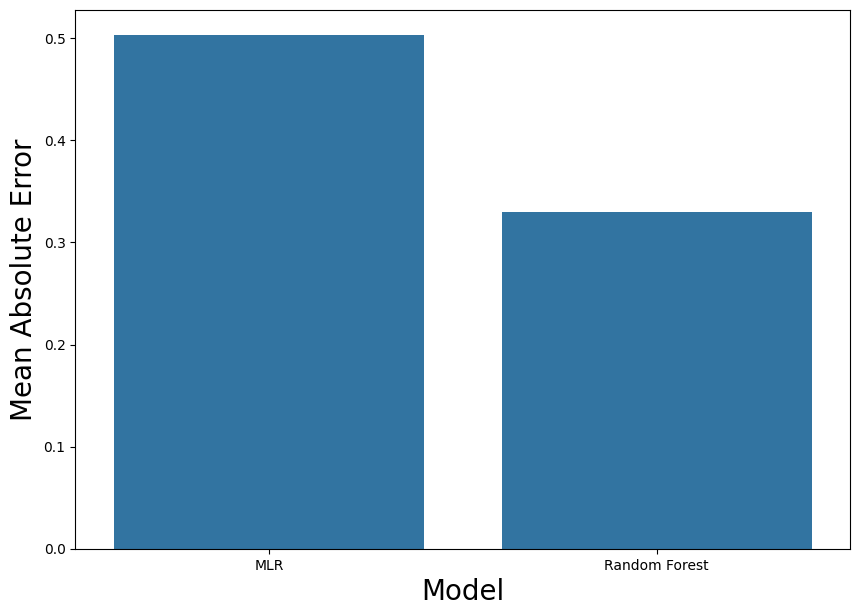

In [ ]:
mae.sort_values(by=(['MAE Score']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,7))
sns.barplot(x = mae['Model'], y=mae['MAE Score'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('Mean Absolute Error', size=20)

plt.show()